In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('demand_data.csv')

In [3]:
df1.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [4]:
df2=pd.read_csv('supply_data.csv')

In [5]:
df2.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [6]:
df1.dtypes

DATE             object
UNEM_RATE       float64
MORTGAGE        float64
GDPC1           float64
FORECLOSURES    float64
HPI             float64
dtype: object

In [7]:
# Convert "DATE" column in df1 to consistent date format
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [8]:
df1.dtypes

DATE            datetime64[ns]
UNEM_RATE              float64
MORTGAGE               float64
GDPC1                  float64
FORECLOSURES           float64
HPI                    float64
dtype: object

In [9]:
df2.dtypes

Unnamed: 0         int64
Period            object
Permit_Number      int64
construction       int64
Homes_Sold         int64
Housing_Starts     int64
dtype: object

In [10]:
# Convert "period" column in dataset2 to consistent date format
df2['Period'] = pd.to_datetime(df2['Period'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
df2.rename(columns={'Period': 'DATE'}, inplace=True)
df2['DATE'] = pd.to_datetime(df2['DATE'])

In [11]:
df2.head()

,Unnamed: 0,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,2000-01-01,1727,353065,873,1636
1,2,2000-02-01,1692,351933,856,1737
2,3,2000-03-01,1651,353452,900,1604
3,4,2000-04-01,1597,356188,841,1626
4,5,2000-05-01,1543,349907,857,1575


In [12]:
#Merge df1 and df2 into dataset3
df3 = pd.merge(df1, df2)
# Save dataset3 
df3.to_csv('df3.csv', index=False)

In [13]:
df3.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Unnamed: 0,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,4,1597,356188,841,1626
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,7,1542,337374,887,1463
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,10,1577,344095,933,1549
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,13,1699,348279,936,1600


In [14]:
# Extract year, month, and day From DATE column so the model can train easily
df3['year'] = df3['DATE'].dt.year
df3['month'] = df3['DATE'].dt.month
df3['day'] = df3['DATE'].dt.day

In [15]:
#drop Date column
df3 = df3.drop('DATE', axis=1)
df3 = df3.drop('Unnamed: 0', axis=1)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNEM_RATE       84 non-null     float64
 1   MORTGAGE        84 non-null     float64
 2   GDPC1           84 non-null     float64
 3   FORECLOSURES    84 non-null     float64
 4   HPI             84 non-null     float64
 5   Permit_Number   84 non-null     int64  
 6   construction    84 non-null     int64  
 7   Homes_Sold      84 non-null     int64  
 8   Housing_Starts  84 non-null     int64  
 9   year            84 non-null     int64  
 10  month           84 non-null     int64  
 11  day             84 non-null     int64  
dtypes: float64(5), int64(7)
memory usage: 8.5 KB


In [17]:
df3.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month,day
0,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636,2000,1,1
1,3.93,8.32,13170.749,1.97,103.67,1597,356188,841,1626,2000,4,1
2,4.00,8.02,13183.890,2.09,105.79,1542,337374,887,1463,2000,7,1
3,3.90,7.62,13262.250,2.23,108.27,1577,344095,933,1549,2000,10,1
4,4.23,7.01,13219.251,2.34,110.48,1699,348279,936,1600,2001,1,1


In [18]:
#Checking null values
df3.isnull().sum()

UNEM_RATE         0
MORTGAGE          0
GDPC1             0
FORECLOSURES      0
HPI               0
Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
year              0
month             0
day               0
dtype: int64

In [19]:
#Checking categorical variables 
categorical_features=[feature for feature in df3.columns if df3[feature].dtypes=='O']
print('number of categorical variables:',len(categorical_features))

number of categorical variables: 0


In [20]:
##Checking NUMERICAL CONTINUOUS FEATURE : float type

numerical_continuous_feature=[feature for feature in df3.columns if  df3[feature].dtype=='float']
df3[numerical_continuous_feature].head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,4.03,8.26,12935.252,1.95,101.34
1,3.93,8.32,13170.749,1.97,103.67
2,4.00,8.02,13183.890,2.09,105.79
3,3.90,7.62,13262.250,2.23,108.27
4,4.23,7.01,13219.251,2.34,110.48


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

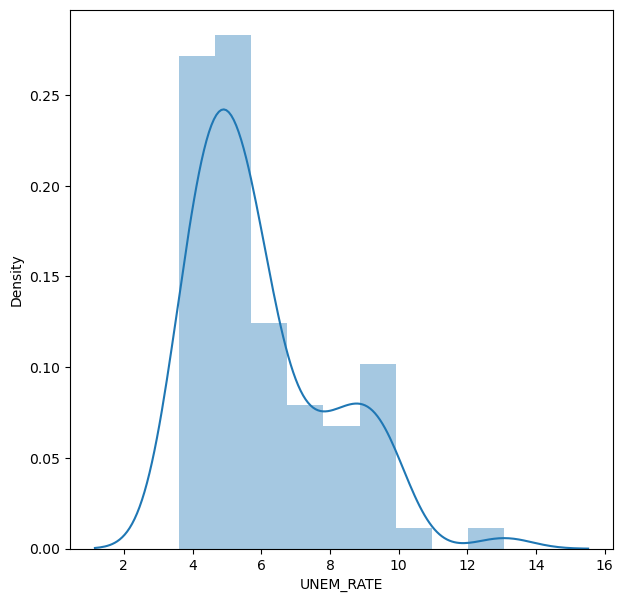

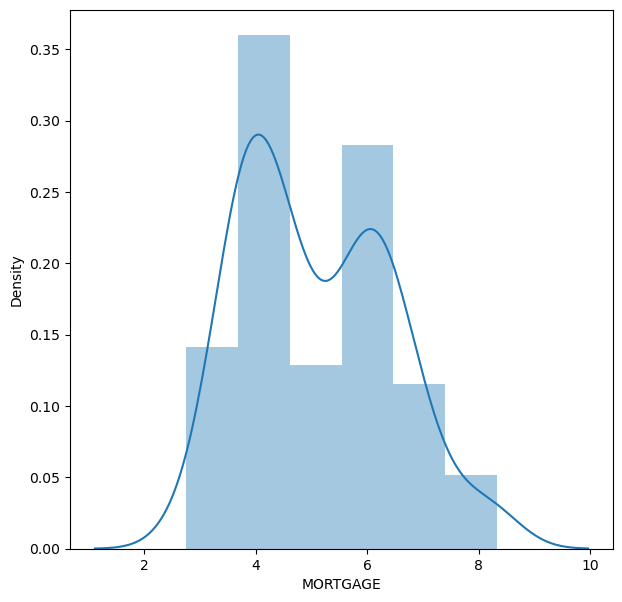

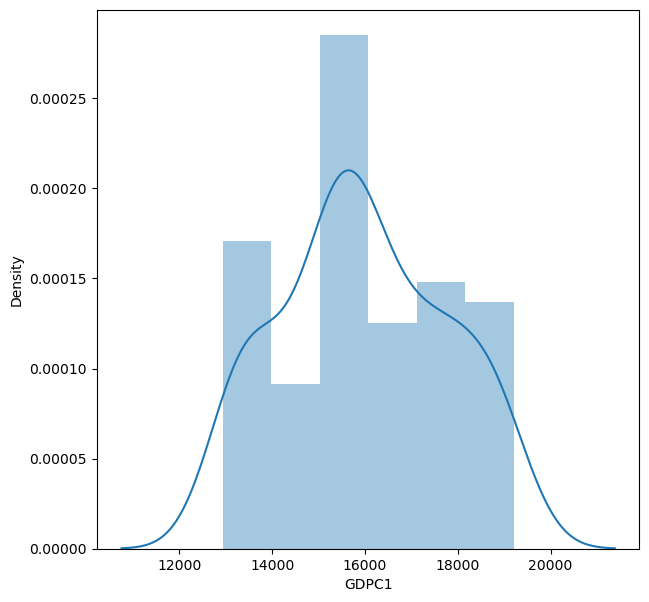

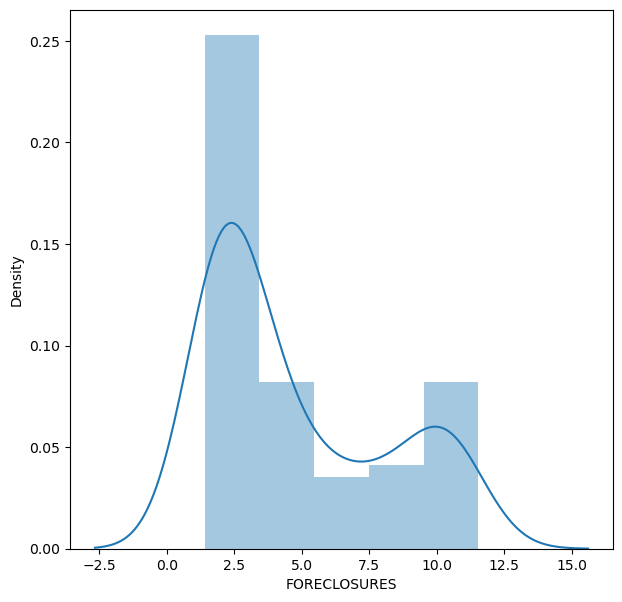

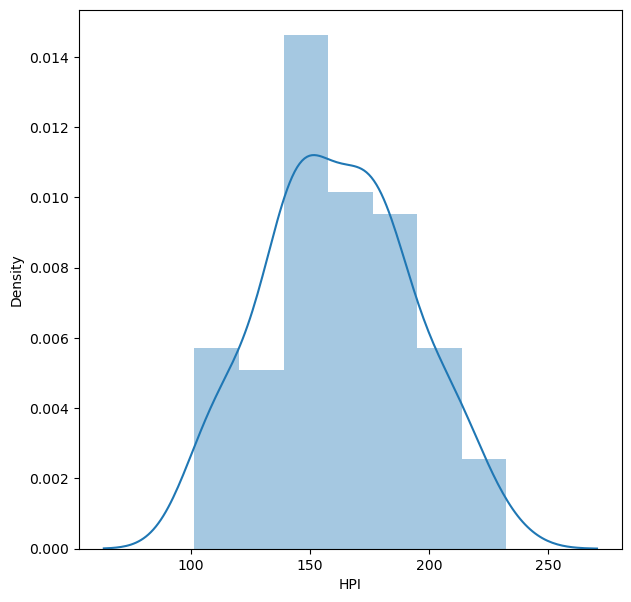

In [22]:
import seaborn as sns
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.distplot(df3[feature],kde=True)

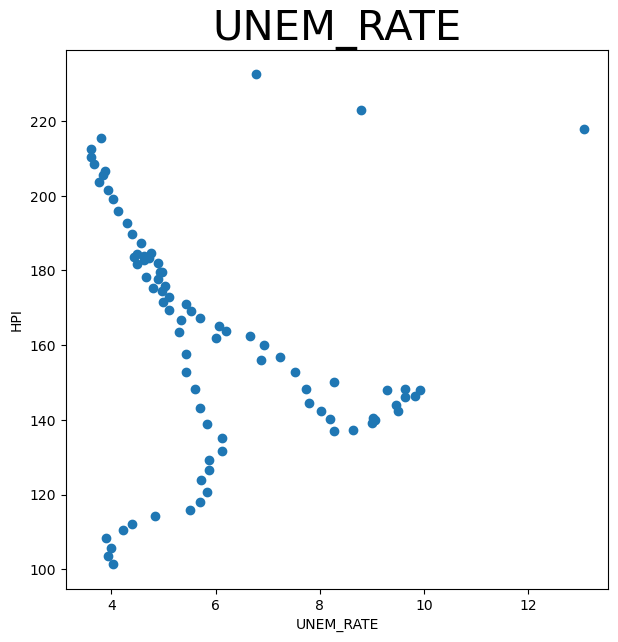

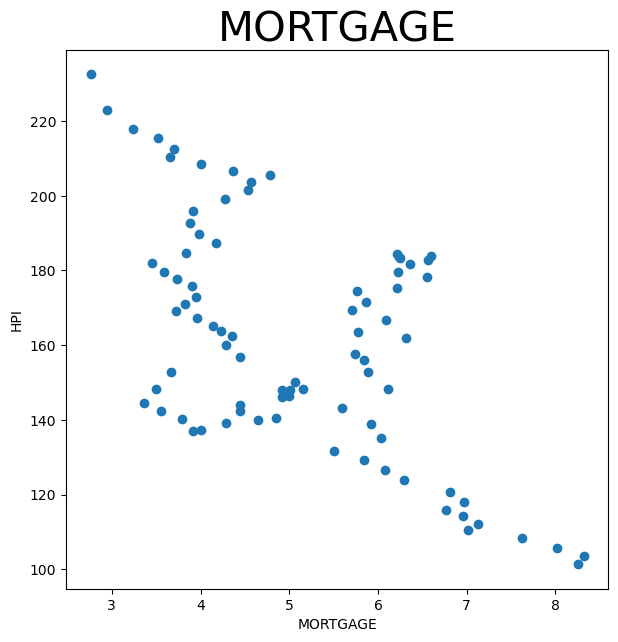

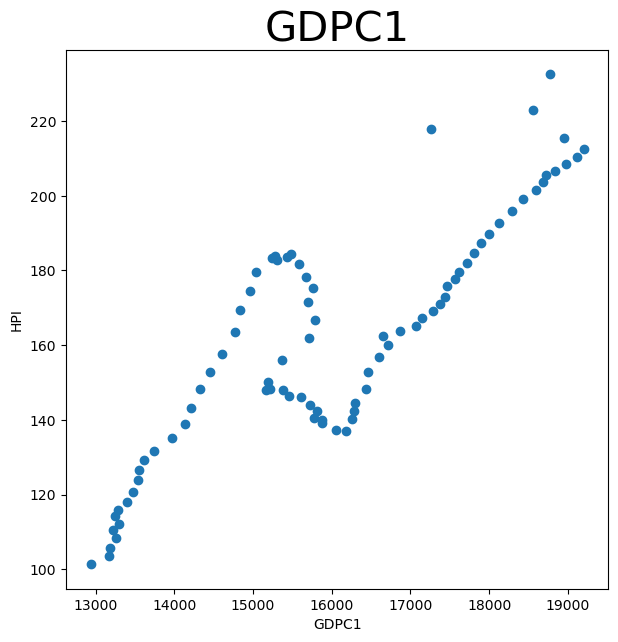

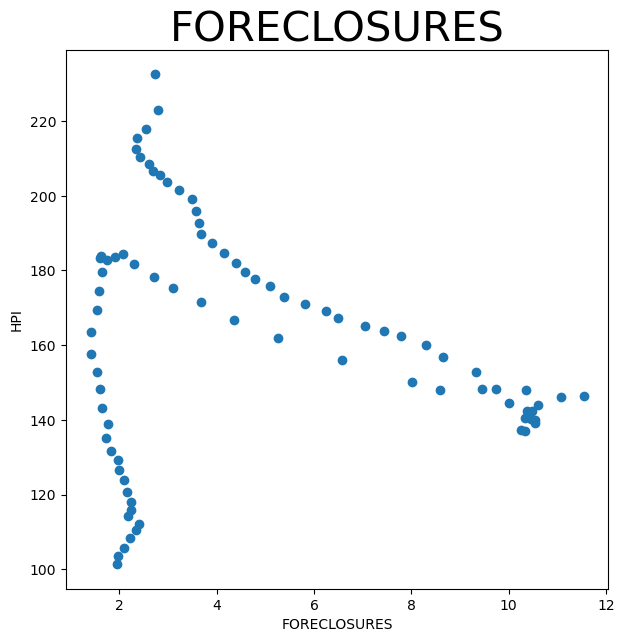

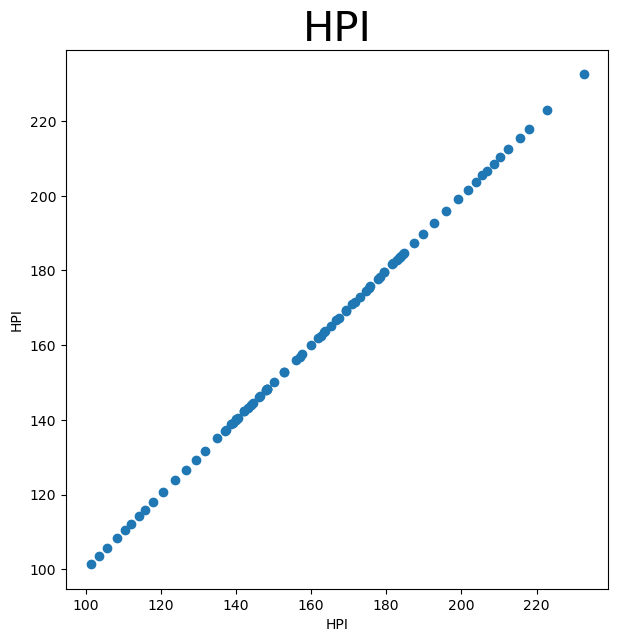

In [23]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='HPI',data=df3)
  plt.xlabel(feature)
  plt.ylabel("HPI")
  plt.title(feature,fontsize=30)

In [57]:
# => Before we go ahead with heatmaps and pairplots , lets do transformation of the data and see the relation with respect to HPI once again

for feature in numerical_continuous_feature:
  df3[feature]=np.log(df3[feature])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

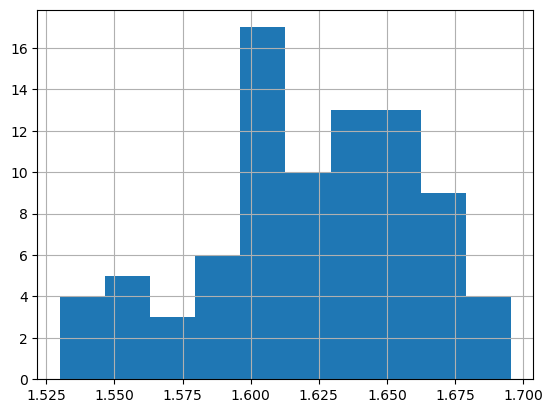

In [26]:
df3['HPI']=np.log(df3['HPI'])
df3['HPI'].hist()

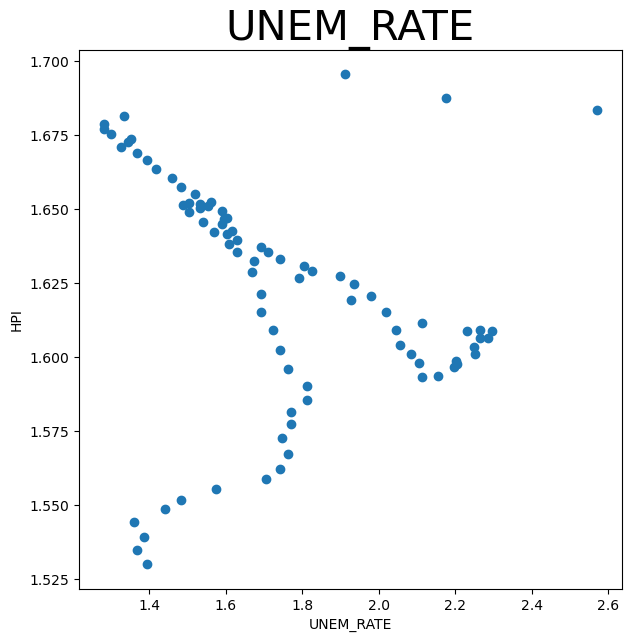

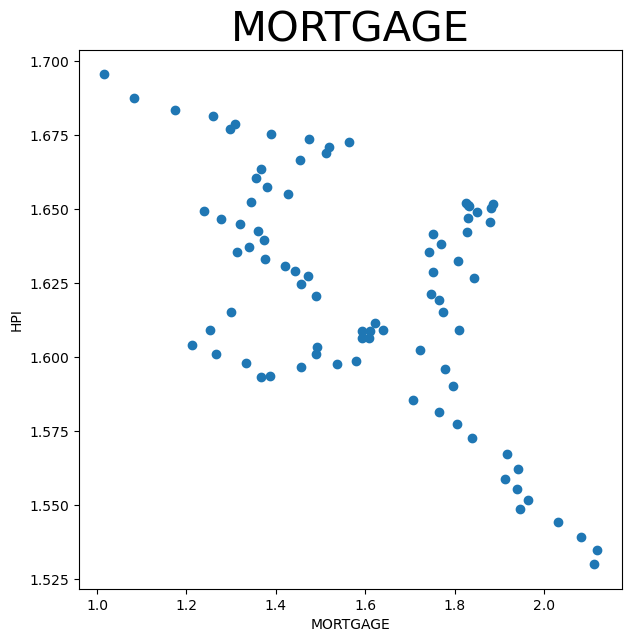

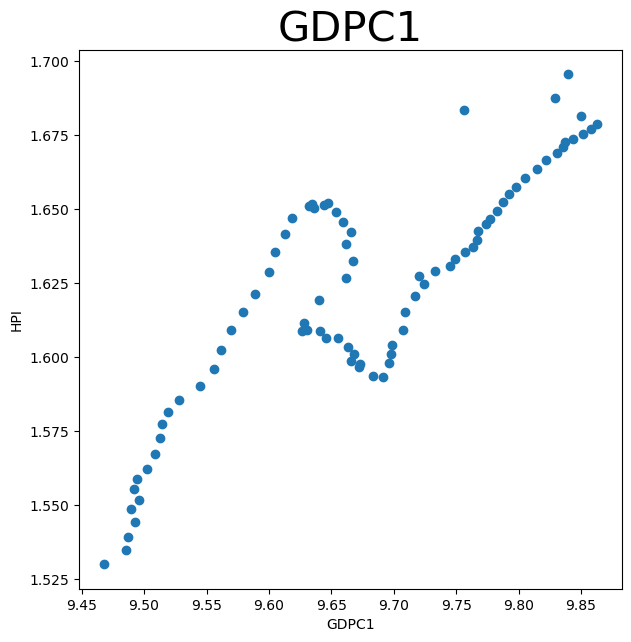

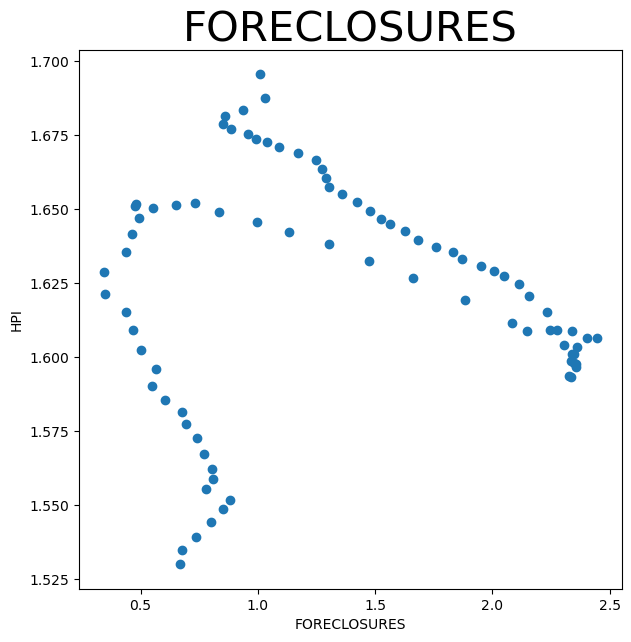

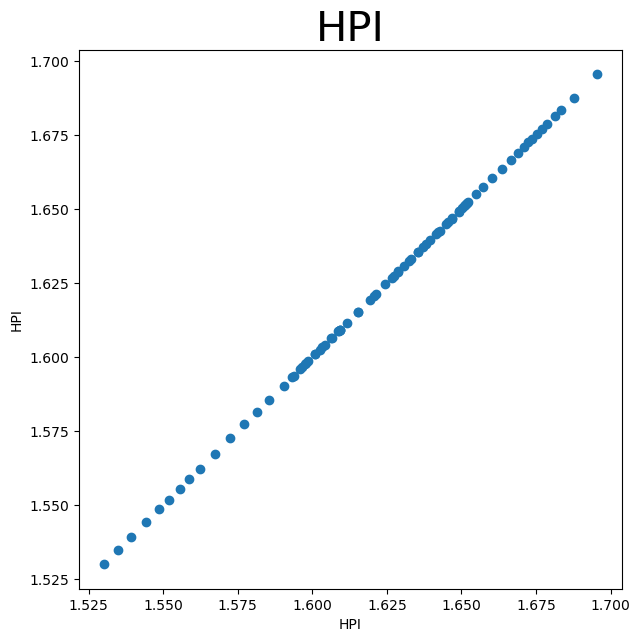

In [27]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='HPI',data=df3)
  plt.xlabel(feature)
  plt.ylabel("HPI")
  plt.title(feature,fontsize=30)


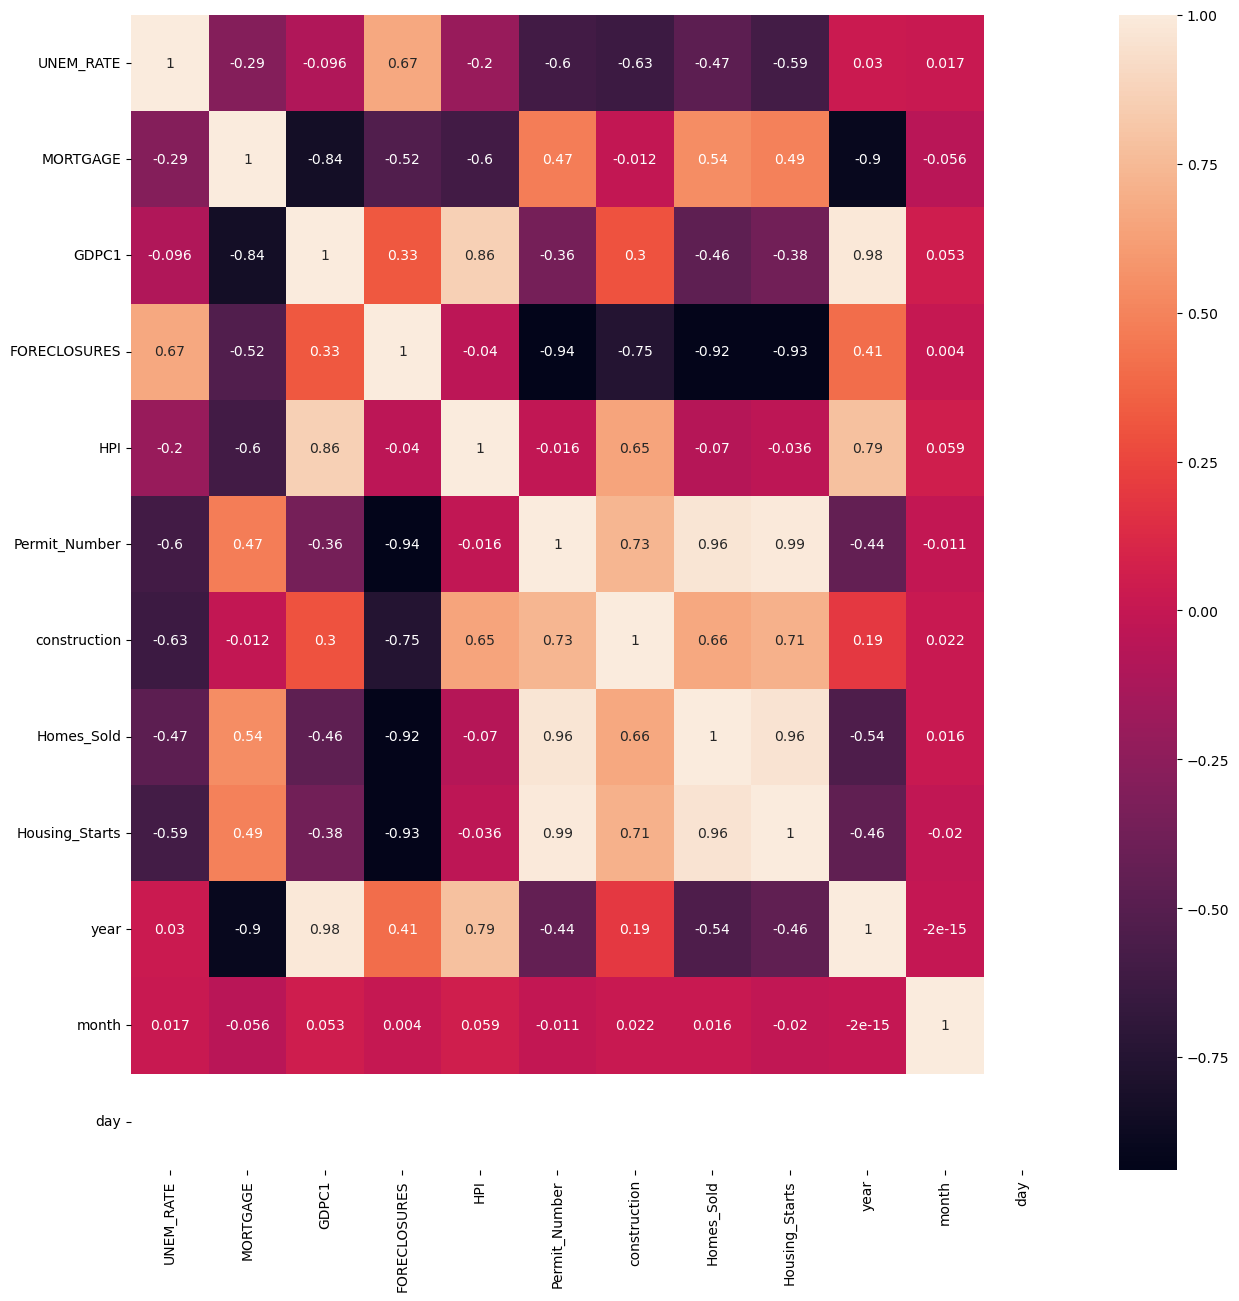

In [29]:
# checking the heatmaps and conclude if there is a factor that have any correlation with HPI
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(),annot=True)
plt.show()

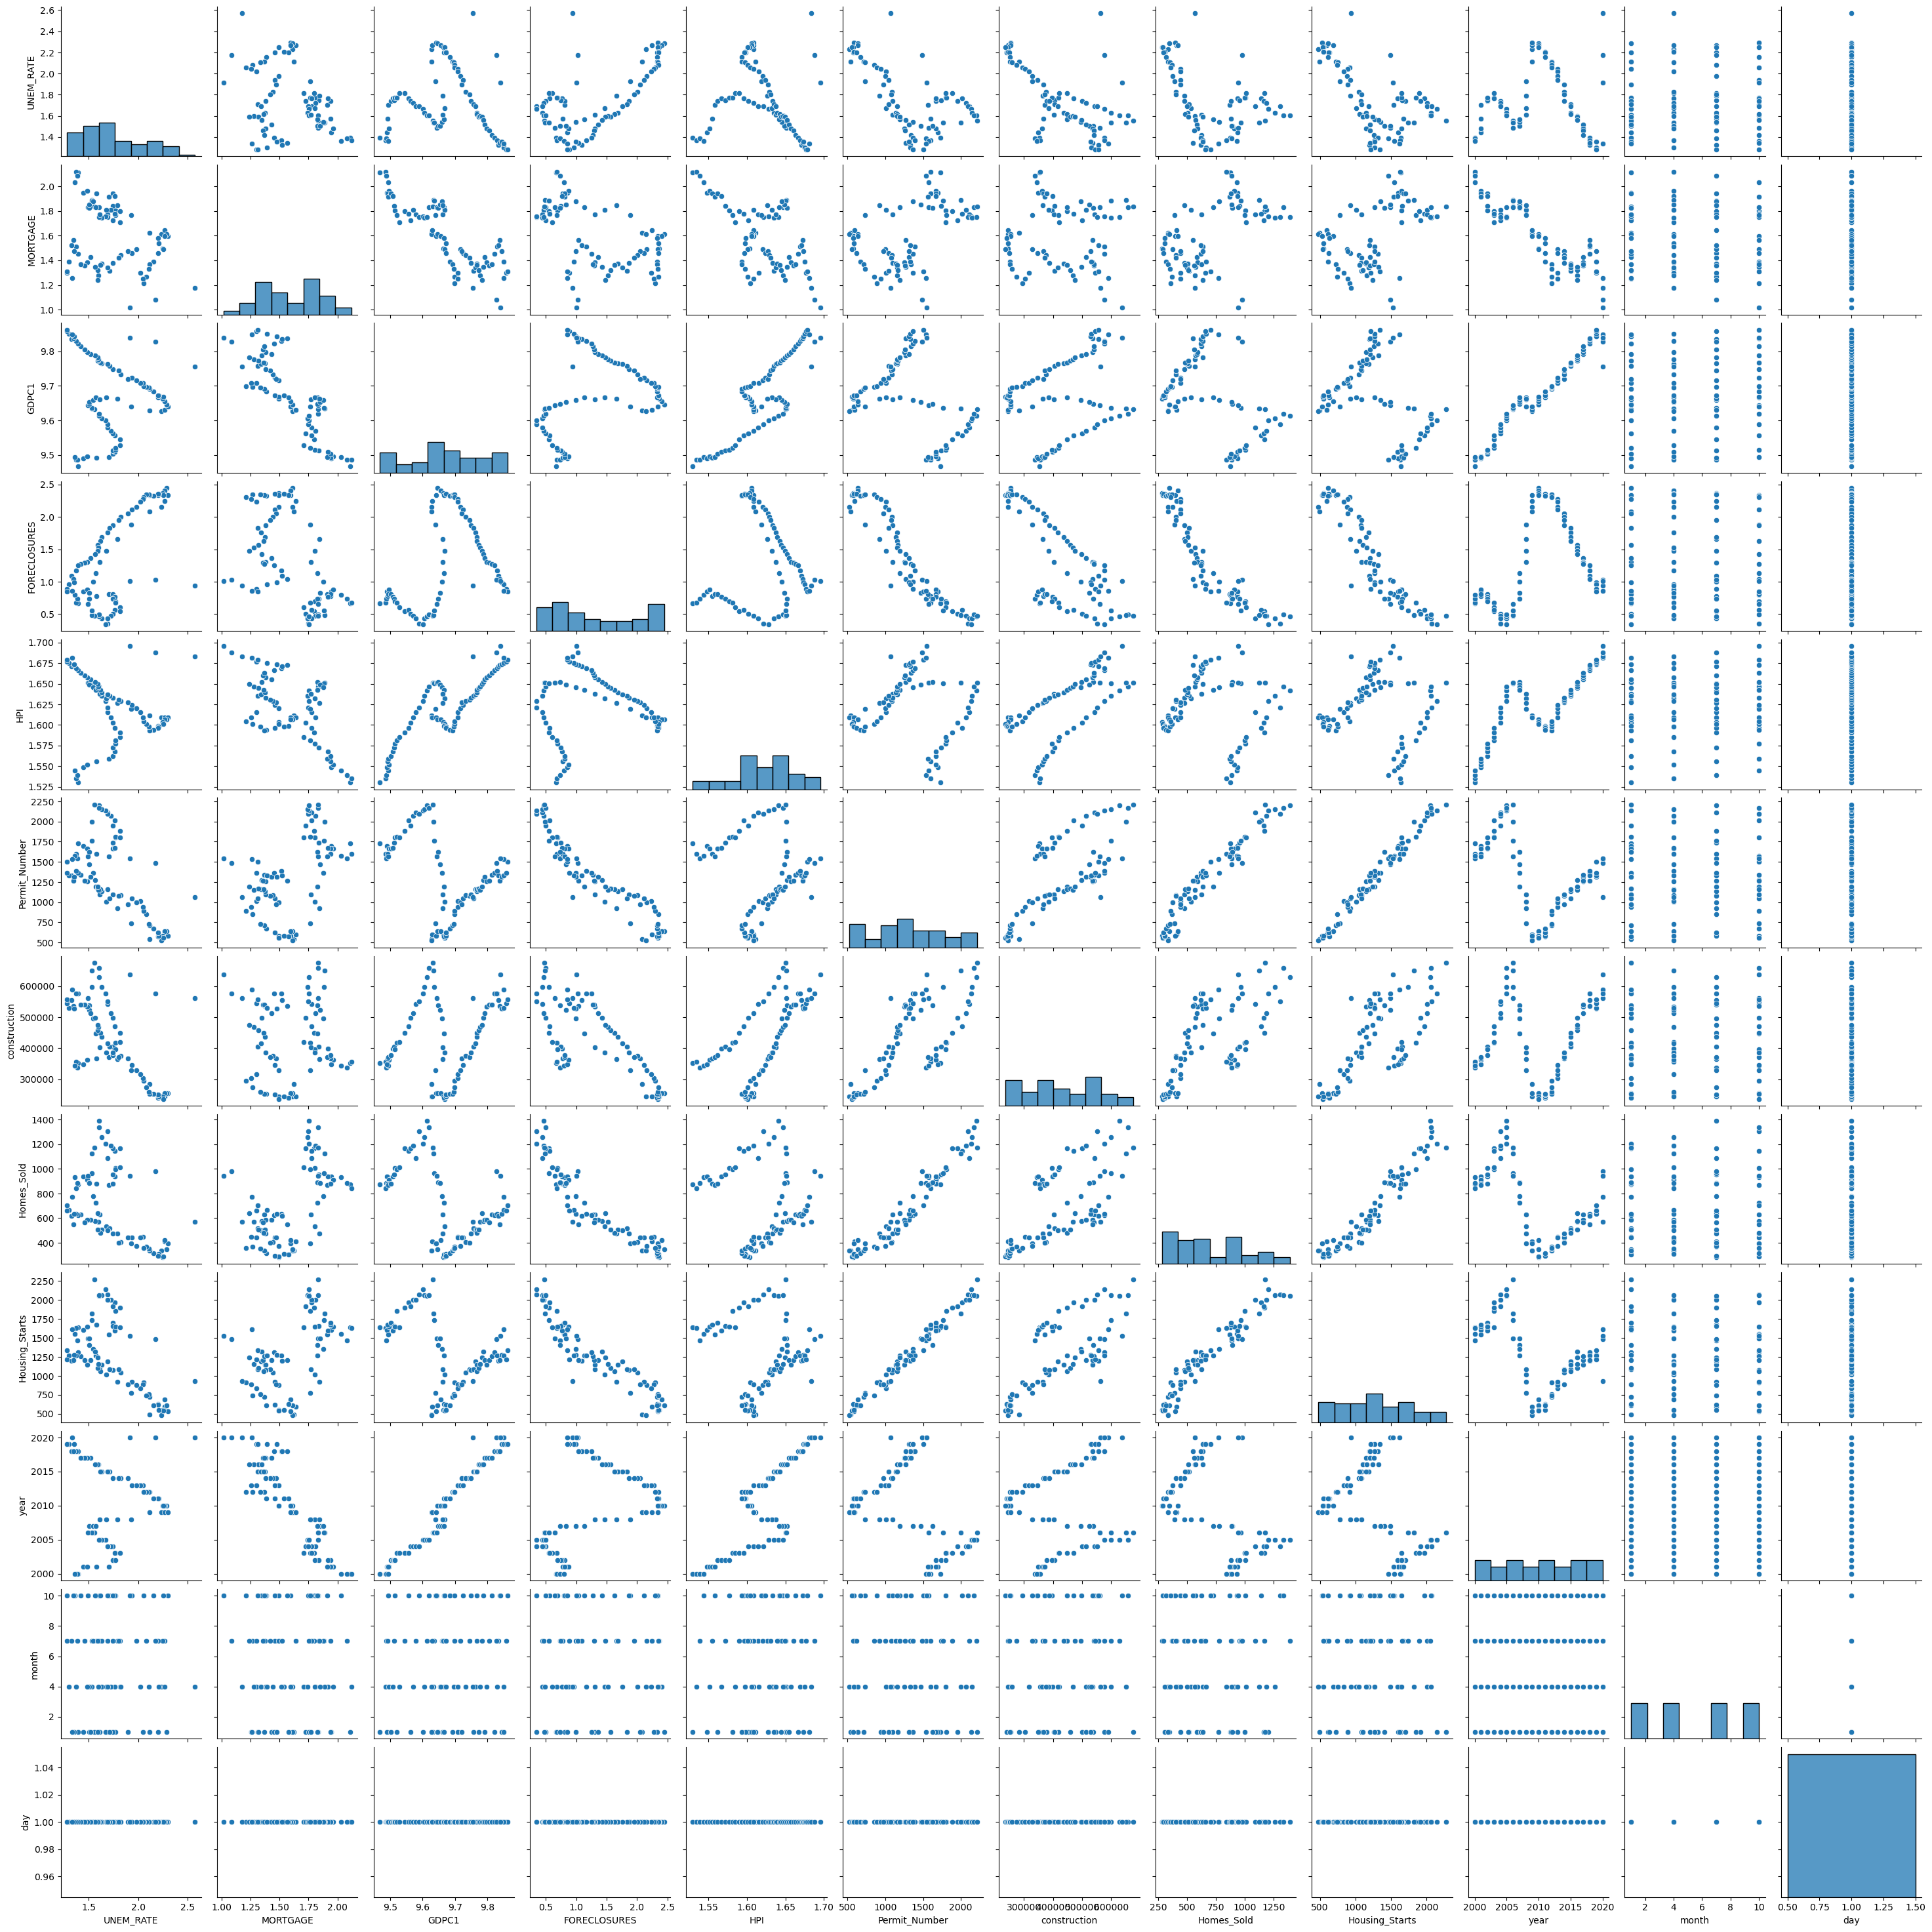

In [30]:
sns.pairplot(data=df3)

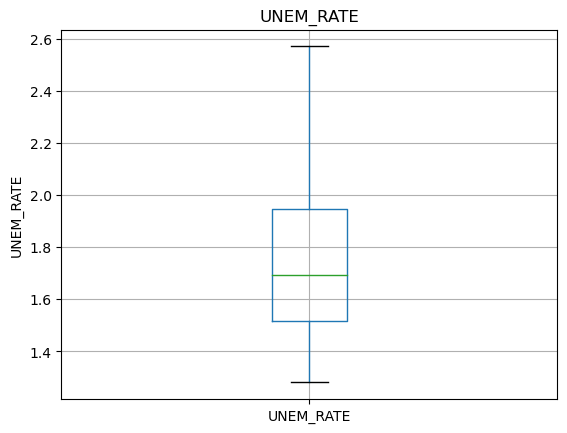

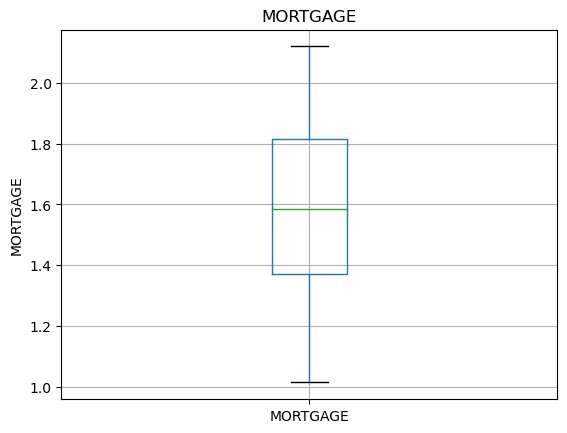

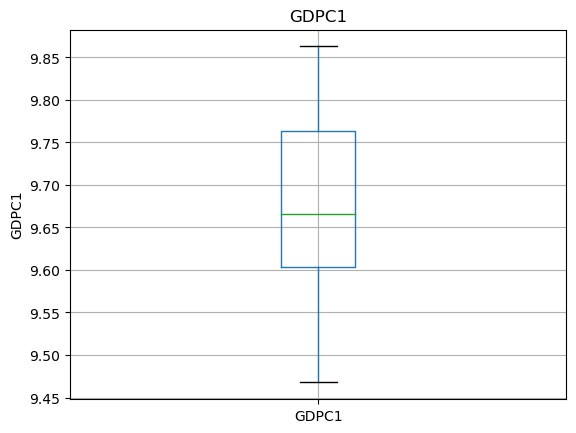

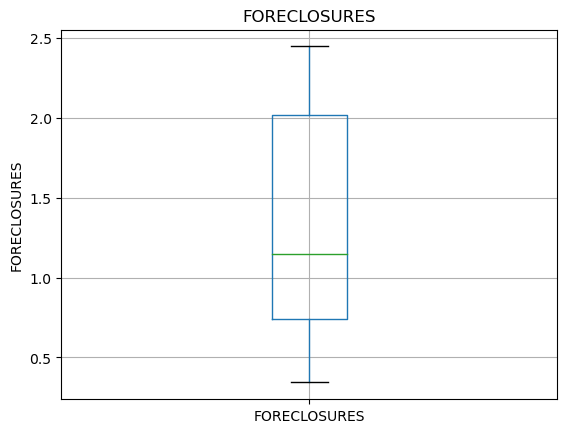

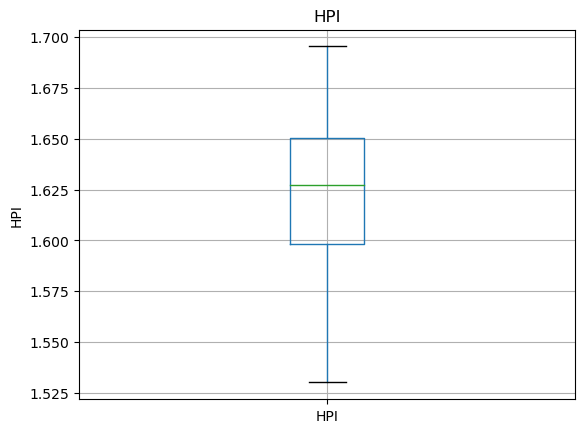

In [31]:
#looking into outliers
for feature in numerical_continuous_feature:
  data=df3.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [38]:
##Checking NUMERICAL CONTINUOUS FEATURE: int type

numerical_continuous_feature=[feature for feature in df3.columns if  df3[feature].dtypes=='int64']
# df3[numerical_continuous_feature].head()

In [39]:
df3[numerical_continuous_feature]

,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month,day
0,1727,353065,873,1636,2000,1,1
1,1597,356188,841,1626,2000,4,1
2,1542,337374,887,1463,2000,7,1
3,1577,344095,933,1549,2000,10,1
4,1699,348279,936,1600,2001,1,1
...,...,...,...,...,...,...,...
79,1503,556693,706,1340,2019,10,1
80,1536,589103,774,1617,2020,1,1
81,1066,562339,570,934,2020,4,1
82,1483,575451,979,1487,2020,7,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

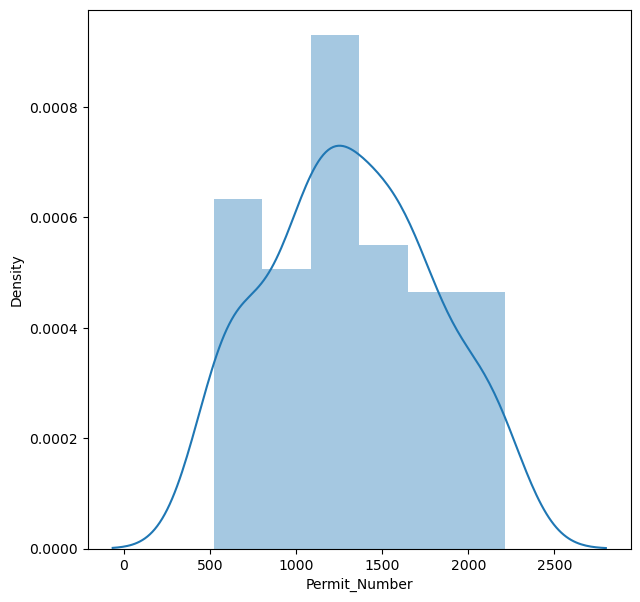

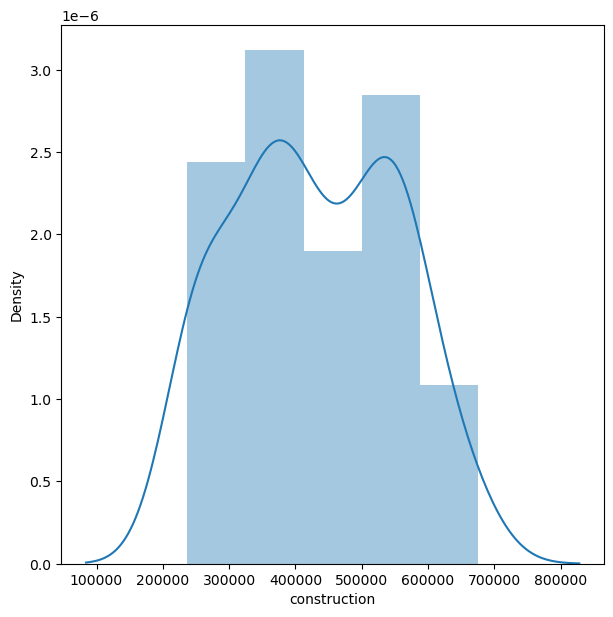

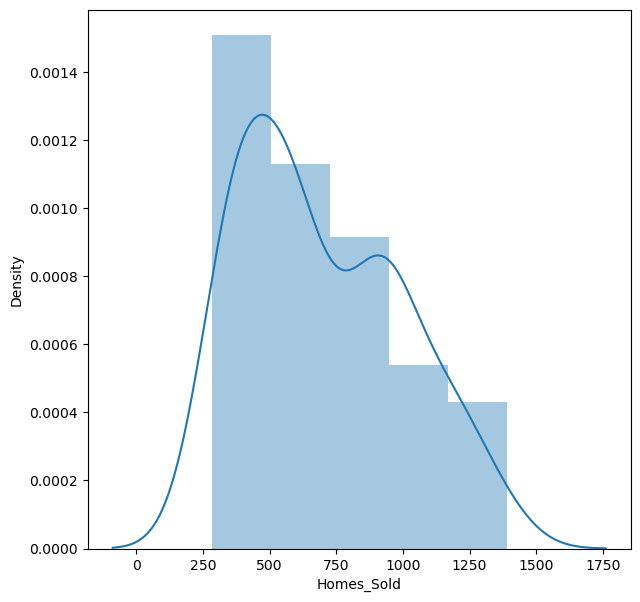

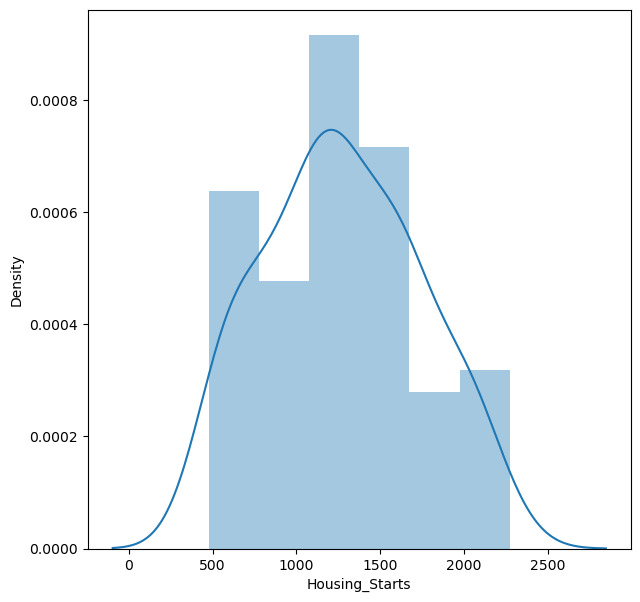

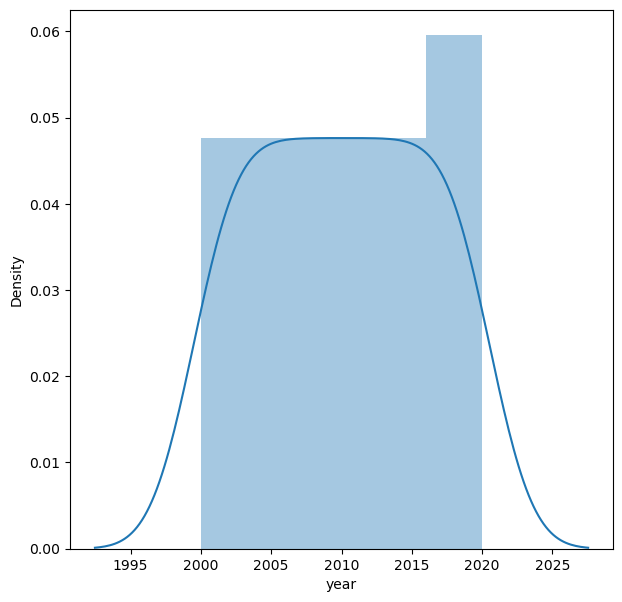

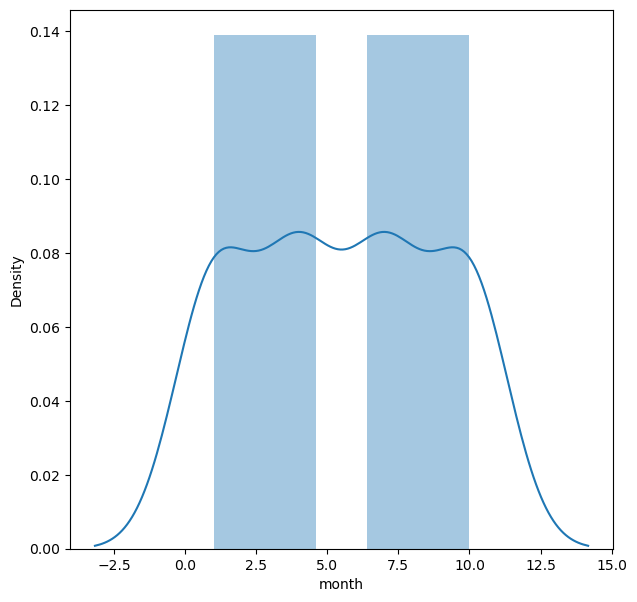

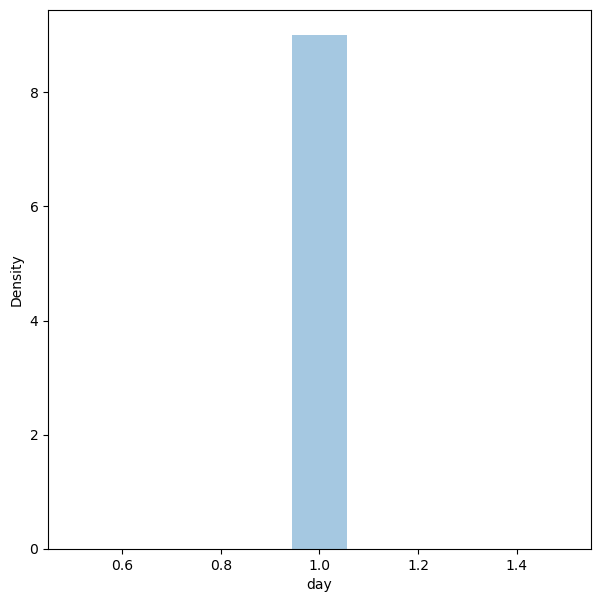

In [41]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.distplot(df3[feature],kde=True)

In [42]:
# => Before we go ahead with heatmaps and pairplots , lets do transformation of the data and see the relation with respect to HPI once again 
for feature in numerical_continuous_feature:
  df3[feature]=np.log(df3[feature])

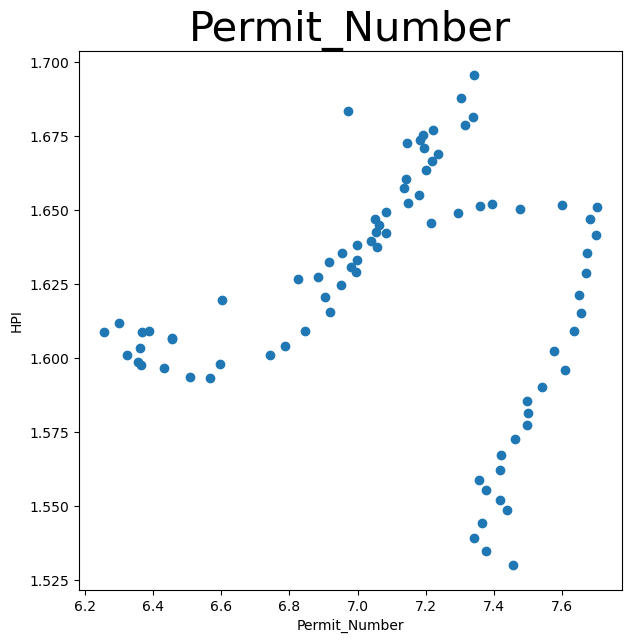

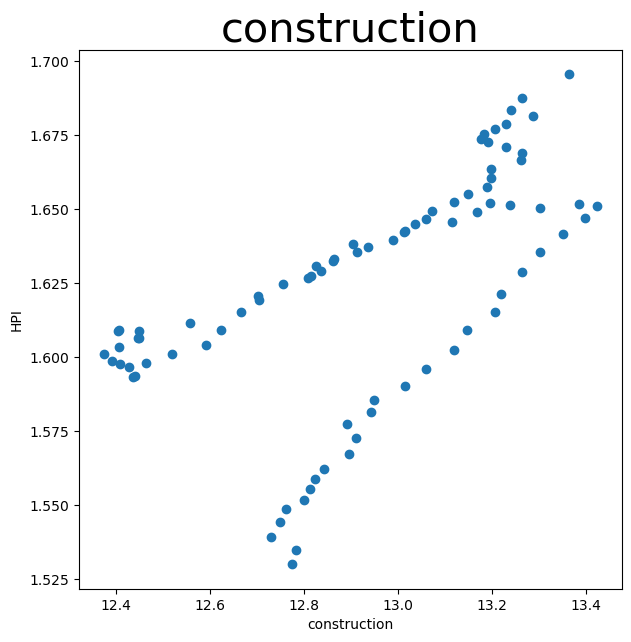

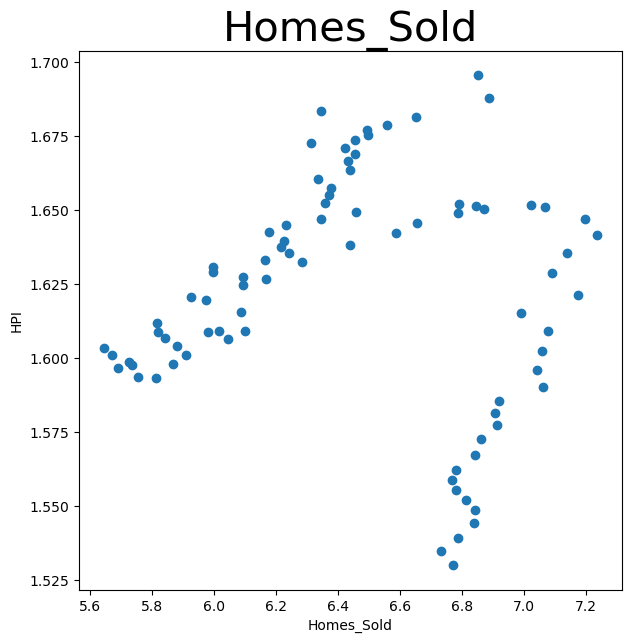

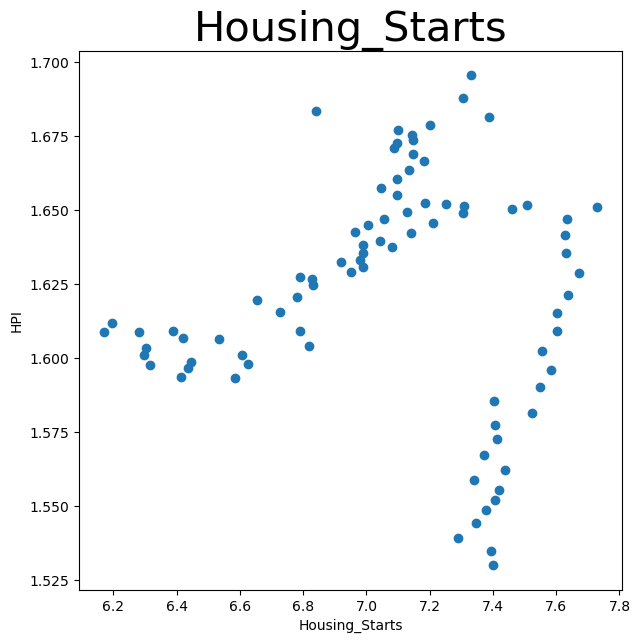

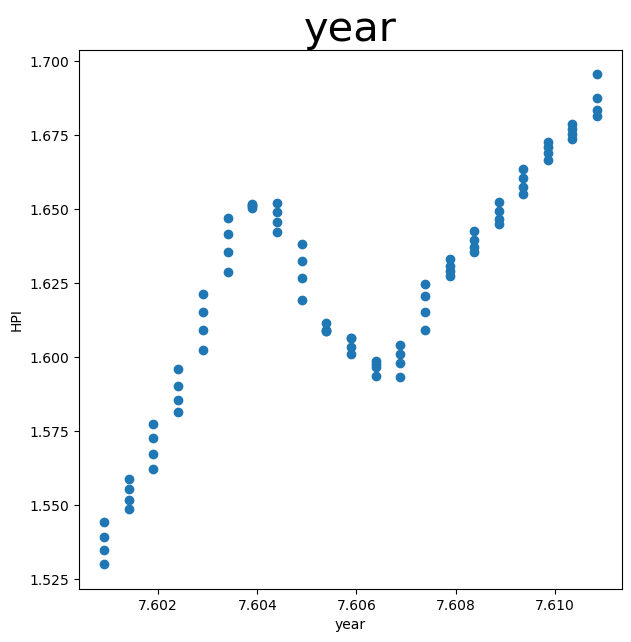

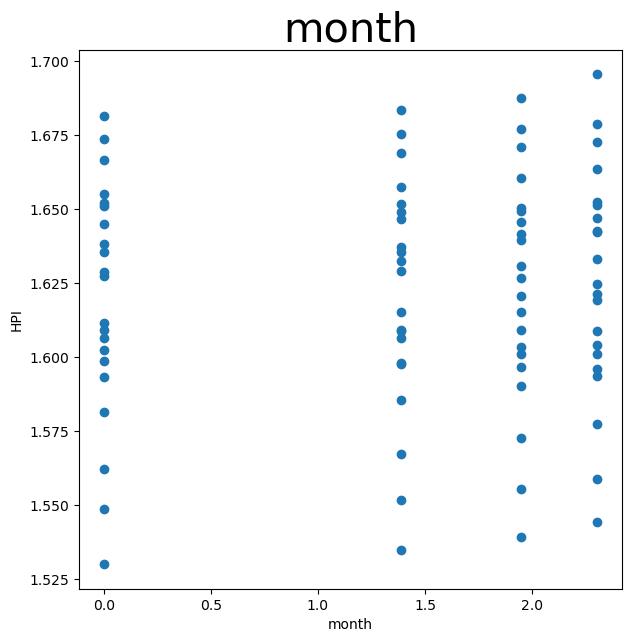

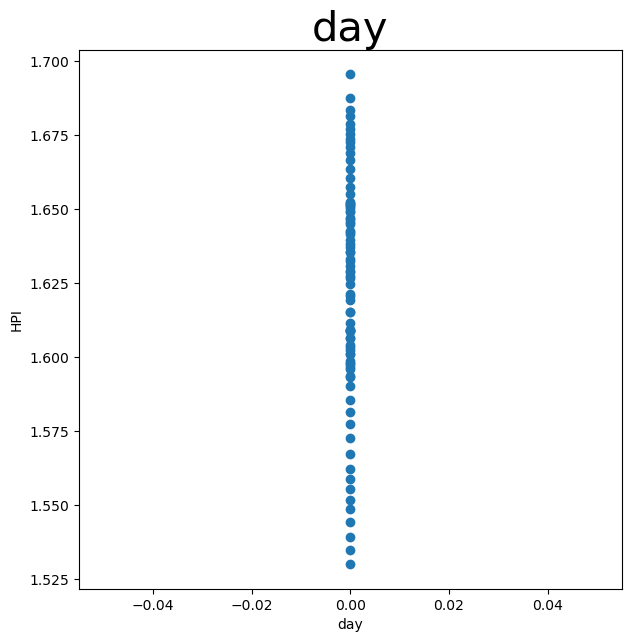

In [43]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='HPI',data=df3)
  plt.xlabel(feature)
  plt.ylabel("HPI")
  plt.title(feature,fontsize=30)

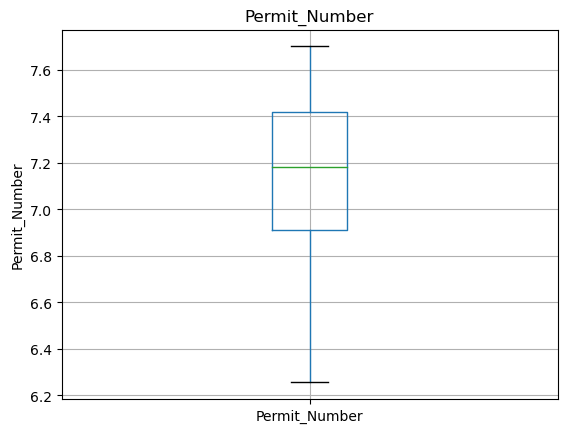

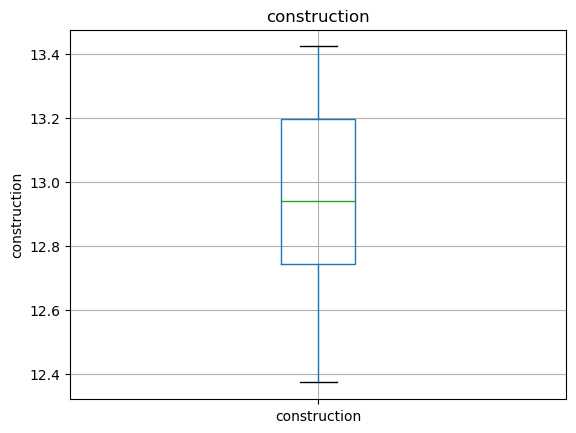

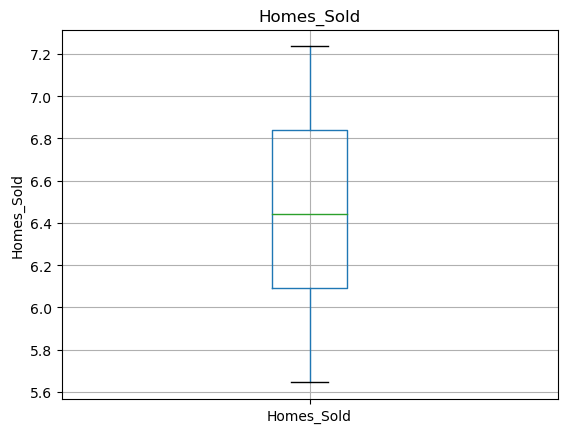

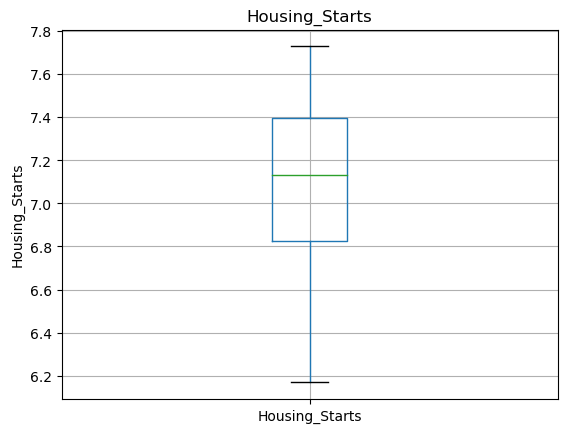

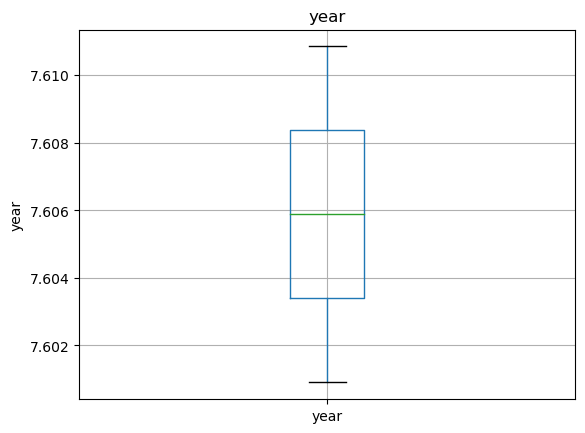

In [44]:
#looking into outliers
for feature in numerical_continuous_feature:
  data=df3.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Training

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
X=df3.drop(['HPI'],axis=1)
y=df3['HPI']

In [48]:
#spliting our dependent and independent features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
print(X_train.shape)
print(X_test.shape)

(58, 11)
(26, 11)


In [50]:
#using a minmaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_X_train= pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)

In [51]:
#Linear regression model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00374964 0.00398948 0.00385296 0.00434822 0.00560079]


In [52]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.97607321598593

In [53]:
#RandomForestRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00705358 0.00429755 0.00560391 0.0024408  0.00571847]


In [54]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9152112435042327

In [55]:
#GradientBoostingRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', GradientBoostingRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00660474 0.00341587 0.00451951 0.0025003  0.0026455 ]


In [56]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9674128470434762

# Conclusion:
    These factors collectively impact U.S. home prices.
    1. Lower unemployment rates, favorable mortgage rates, a strong GDP, and high demand contribute to higher home prices.
    2. Conversely, high foreclosure rates, rising mortgage rates, oversupply, and reduced demand can lead to lower home prices.
    
The balance between supply and demand as influenced by permits, construction, homes sold and housing starts, plays a crucial role in determining the trajectory of home prices in the market.